In [1]:
#マウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
##作業するディレクトリを指定する.
%cd '/content/drive/MyDrive/Colab_Notebooks/arXiv_data'

/content/drive/MyDrive/Colab_Notebooks/arXiv_data


In [3]:
#関係するツールの導入
import os
import numpy as np
import pandas as pd
import collections
import re
from string import digits

import sys
import time

In [4]:
#input_folder_path: 入力となるファイルの保存場所
input_folder_path ='/content/drive/MyDrive/Colab_Notebooks/arXiv_data/Step_6'
#output_folder_path: 出力となるpdfファイルの保存場所
output_folder_path = '/content/drive/MyDrive/Colab_Notebooks/arXiv_data/Step_7'

In [5]:
#モジュール
module_path = '/content/drive/My Drive/Colab_Notebooks/arXiv_data/module/'
os.chdir(module_path)
import file_processing

In [6]:
file_names_list = file_processing.read_file_to_list(input_folder_path + "/" + 'k_means_id_list_10_20_sub.txt')

In [7]:
file_names_list

['0704.2723',
 '0704.3127',
 '0704.3443',
 '0704.3752',
 '0705.0118',
 '0705.1316',
 '0705.2332',
 '0705.2522',
 '0705.3087',
 '0705.3860',
 '0704.1446',
 '0704.1543',
 '0704.1673',
 '0704.1807',
 '0704.1851',
 '0704.1986',
 '0704.2081',
 '0704.2119',
 '0704.2152',
 '0704.2646',
 '0704.1208',
 '0704.1349',
 '0704.1352',
 '0704.1372',
 '0704.1861',
 '0704.1862',
 '0704.1954',
 '0704.2031',
 '0704.2104',
 '0704.2359']

In [8]:
len(file_names_list)

30

In [9]:
df = pd.read_csv(input_folder_path + "/rate_data_100.csv")
df = df.drop('Unnamed: 0', axis=1)

##クラスタリングの前準備

In [10]:
#正規化
def minmax_norm(list_input):
    return (list_input - list_input.min()) / ( list_input.max() - list_input.min())

K-平均法

In [11]:
#k平均法に必要なパッケージ
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np

In [12]:
#クラスタリングの結果からfile名をクラスタごとに分ける
# show_result (str_list,int_array,int) -> str_list_list
def show_result (file, result_k,n):
  result_file = []
  for i in range(n):
    result_file.append([])
  for j in range(len(file)):
    l = result_k[j]
    result_file[l].append(file[j])
  #return print(result_file)
  return result_file

In [13]:
#傾向となる単語を取りだす
#df: データ k_means_result:k-means法でクラスタリングした結果, n:クラスタリングの個数
def trend (df,k_means_result,n,m,dictionary):
  trend = []
  df['cluster_id']=k_means_result
  for i in range(n):
    trend_n = df[df['cluster_id']==i].mean()
    trend_number = trend_n.drop('cluster_id', axis=0)
    trend_word = trend_number.sort_values(ascending = False)[0:m].index
    trend.append((i,trend_word))
  #return print(trend)
  return trend

階層的クラスタリング

In [14]:
#階層的クラスタリングに必要なパッケージ
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [15]:
def plot_dendrogram(model, **kwargs):
   # Create linkage matrix and then plot the dendrogram

   # create the counts of samples under each node
    #要素の値が全てゼロの配列を作成する
   counts = np.zeros(model.children_.shape[0])
   n_samples = len(model.labels_)
   for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
         if child_idx < n_samples:
            current_count += 1 # leaf node
         else:
            current_count += counts[child_idx - n_samples]
      counts[i] = current_count

   linkage_matrix = np.column_stack([model.children_, model.distances_,
counts]).astype(float)

   # Plot the corresponding dendrogram
   #dendrogram(linkage_matrix, **kwargs,labels = file_names_list,leaf_rotation=90 )#, orientation='left')
   dendrogram(linkage_matrix, **kwargs,labels = file_names_list, orientation='left')

In [16]:
df

,subalgebra,subalgebras,nilpotent,algebras,maximal,strongly,proper,generated,abelian,engel,division,graded,superalgebras,quaternion,idempotent,albert,grading,homogeneous,centralizer,involution,azumaya,severi,extension,split,algebra,brauer,degree,prime,extn,homa,rows,generalizing,monomial,entries,epimorphisms,homological,modules,characterisation,torr,homr,...,hayashi,gain,sobolev,gronwall,dxdt,matthias,radon,luca,allen,rectiﬁable,nucleation,measures,deduce,lipschitz,laws,semigroup,bressan,chapman,semigroups,balance,genuinely,piecewise,parametrization,control,operators,module,operator,freeness,controllability,pdes,stokes,navier,lions,brouwer,proposes,laminar,thanks,checks,problem,incompressible
0,193.980634,144.551880,87.287827,57.872810,52.158007,49.357987,49.255187,48.485206,46.269192,45.278283,-0.315731,-0.492673,-0.153636,-0.137610,-0.186743,-0.211521,-0.264348,-0.688007,-0.134175,-0.299807,-0.097988,-0.091659,-0.770552,1.373003,34.833502,-0.177404,-1.085878,3.077211,-0.087567,-0.106153,-0.340818,-0.197164,-0.300362,-0.453117,-0.083673,-0.189753,-0.697156,-0.125974,-0.114610,-0.168340,...,-0.146300,-0.464885,-0.278475,-0.105207,-0.134175,-0.104571,-0.175894,-0.116343,-0.275707,-0.091659,-0.234115,-0.565586,-0.468955,-0.288934,-0.446594,-0.310943,-0.110161,-0.200018,-0.178528,-0.354437,-0.095227,-0.256799,-0.333200,-0.739679,-1.138471,-0.850860,-1.333053,-0.093816,-0.095925,-0.130651,-0.374205,-0.232973,-0.093816,-0.110764,-0.114027,-0.116629,-0.421790,-0.225409,-1.425202,-0.173797
1,21.528320,-0.249789,-0.460230,10.641297,-0.999432,-1.109155,3.131671,0.730687,-0.918619,-0.153174,86.121933,85.448214,84.046917,83.429367,80.616899,71.108314,62.207885,54.454156,53.414210,52.359073,-0.136248,-0.127448,1.729162,2.000117,38.554376,44.347246,3.128147,12.281221,-0.121758,-0.147602,-0.473894,-0.274148,-0.417642,0.957270,-0.116344,-0.263844,0.062404,-0.175161,-0.159361,-0.234070,...,-0.203424,-0.646404,-0.387208,-0.146286,-0.186566,-0.145402,-0.244574,-0.161770,-0.383360,-0.127448,-0.325528,-0.786424,-0.652064,-0.401751,-0.620971,-0.432354,-0.153174,-0.278117,-0.248236,-0.492831,-0.132409,-0.357068,-0.463301,-1.028494,-1.582998,13.189636,-1.853557,-0.130448,-0.133379,-0.181664,-0.520317,-0.323940,-0.130448,-0.154013,-0.158550,-0.162168,1.118705,-0.313422,-1.981686,-0.241657
2,1.948029,-0.193860,-0.357182,46.969257,1.803275,-0.860808,-0.756181,-1.090499,-0.712934,-0.118877,34.880616,-0.531656,-0.165793,60.458459,-0.201519,8.533873,-0.285265,-0.742447,-0.144792,-0.323529,151.207589,70.671404,66.528373,55.759038,54.879485,52.044457,44.929613,43.116456,-0.094496,-0.114553,-0.367786,-0.212765,-0.324129,-0.488970,-0.090294,-0.204768,0.577123,-0.135941,-0.123679,-0.181660,...,-0.157876,-0.501670,-0.300509,-0.113532,-0.144792,-0.112846,-0.189812,-0.125548,-0.297523,-0.098912,-0.252640,-0.610338,-0.506062,-0.311796,-0.481931,-0.335547,-0.118877,-0.215844,-0.192654,-0.382483,-0.102762,-0.277118,-0.359565,-0.798207,-1.228554,4.528675,-1.438533,-0.101239,-0.103515,-0.140988,-0.403815,-0.251408,-0.101239,-0.119529,-0.123050,-0.125857,-0.455164,-0.243245,-1.537973,-0.187548
3,4.707722,-0.261230,-0.481311,46.414801,-1.045210,-1.159959,0.944118,18.272342,-0.960695,-0.160190,-0.459120,81.644381,-0.223410,-0.200106,-0.271551,-0.307584,10.021647,23.991953,-0.195111,-0.435964,-0.142489,-0.133286,3.342709,0.540654,53.093759,-0.257972,37.067803,-0.801605,78.405806,64.628301,62.057310,55.520452,47.644770,40.321426,-0.121673,17.844860,13.784956,-0.183184,-0.166661,-0.244791,...,-0.212742,-0.676012,-0.404943,-0.152987,-0.195111,-0.152062,-0.255776,-0.169179,-0.400919,-0.133286,-0.340438,-0.822446,-0.681931,-0.420153,-0.649414,-0.452158,-0.160190,-0.290855,-0.259606,-0.515405,-0.138474,-0.373424,-0.484523,-1.075603,-1.655506,31.099730,-1.938457,-0.136423,-0.139489,-0.189985,-0.544150,-0.338778,-0.136423,-0.161068,-0.165812,-0.169596,-0.613345,5.774017,-2.072455,-0.252726
4,-0.374111,-0.171875,-0.316675,5.323126,-0.687688,-0.763186,-0.670425,-0.966829,-0.632083,

##データの加工

In [17]:
#各単語に対して正規化をする．
df_minmax_norm = df.apply(minmax_norm)

##K-means法

In [18]:
number_cluster = 5

In [19]:
#k-means
result = KMeans(n_clusters= number_cluster ).fit_predict(df_minmax_norm)

In [20]:
show_result(file_names_list,result,number_cluster)

[['0704.1673', '0704.1851', '0704.2081', '0704.2646'],
 ['0704.1446', '0704.1543'],
 ['0704.2723',
  '0704.3752',
  '0705.0118',
  '0705.1316',
  '0705.2332',
  '0704.1807',
  '0704.1986',
  '0704.2119',
  '0704.2152',
  '0704.1208',
  '0704.1349',
  '0704.1954',
  '0704.2031',
  '0704.2104',
  '0704.2359'],
 ['0704.1861', '0704.1862'],
 ['0704.3127',
  '0704.3443',
  '0705.2522',
  '0705.3087',
  '0705.3860',
  '0704.1352',
  '0704.1372']]

In [21]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,number_cluster,10,df_minmax_norm.columns)

[(0, Index(['ahler', 'curvature', 'conformally', 'ricci', 'robin', 'metric',
         'graham', 'manifolds', 'properness', 'manifold'],
        dtype='object')),
 (1,
  Index(['discrete', 'algebroid', 'groupoids', 'mart', 'groupoid', 'iglesias',
         'lagrangian', 'diego', 'algebroids', 'unconstrained'],
        dtype='object')),
 (2, Index(['epimorphisms', 'subalgebra', 'dxdt', 'homological', 'algebras',
         'laminations', 'algebra', 'subalgebras', 'extremal', 'nilpotent'],
        dtype='object')),
 (3, Index(['korteweg', 'vera', 'vries', 'craig', 'regularity', 'kenig',
         'dispersive', 'posedness', 'analyticity', 'kato'],
        dtype='object')),
 (4, Index(['permitting', 'indecomposable', 'nondegenerate', 'kukl', 'azumaya',
         'algebra', 'division', 'quaternion', 'jordan', 'composition'],
        dtype='object'))]

##階層的クラスタリング

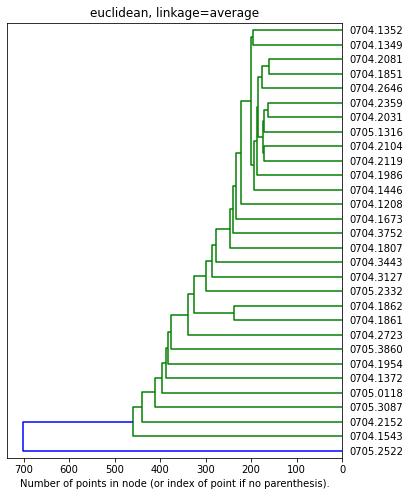

In [22]:
parm_affinity = 'euclidean'
param_linkage = 'average'
  # setting distance_threshold=0 ensures we compute the full tree.
  # affinity: 距離の出す際の計算方法 
  #linkage : 観測セット間で使用する距離 ward マージされるクラスターの分散を最小限に抑える 
  #distance_threshold クラスターはマージされないリンケージ距離のしきい値
  #n_clusters 検索するクラスターの数
model = AgglomerativeClustering(affinity= parm_affinity,
linkage= param_linkage, 
distance_threshold=0,
n_clusters=None)
model = model.fit(df)
fig = plt.figure( figsize=(6,8))
plt.title(parm_affinity + ', linkage=' + param_linkage )
  # plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')#, p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.figure(figsize=(6, 8), dpi=300)
  #fig.savefig("dendrogram.pdf")
fig.savefig( output_folder_path + "/dendrogram_z_euclidean_mean_sub_2.pdf", bbox_inches='tight')
plt.show()

In [23]:
df

,subalgebra,subalgebras,nilpotent,algebras,maximal,strongly,proper,generated,abelian,engel,division,graded,superalgebras,quaternion,idempotent,albert,grading,homogeneous,centralizer,involution,azumaya,severi,extension,split,algebra,brauer,degree,prime,extn,homa,rows,generalizing,monomial,entries,epimorphisms,homological,modules,characterisation,torr,homr,...,gain,sobolev,gronwall,dxdt,matthias,radon,luca,allen,rectiﬁable,nucleation,measures,deduce,lipschitz,laws,semigroup,bressan,chapman,semigroups,balance,genuinely,piecewise,parametrization,control,operators,module,operator,freeness,controllability,pdes,stokes,navier,lions,brouwer,proposes,laminar,thanks,checks,problem,incompressible,cluster_id
0,193.980634,144.551880,87.287827,57.872810,52.158007,49.357987,49.255187,48.485206,46.269192,45.278283,-0.315731,-0.492673,-0.153636,-0.137610,-0.186743,-0.211521,-0.264348,-0.688007,-0.134175,-0.299807,-0.097988,-0.091659,-0.770552,1.373003,34.833502,-0.177404,-1.085878,3.077211,-0.087567,-0.106153,-0.340818,-0.197164,-0.300362,-0.453117,-0.083673,-0.189753,-0.697156,-0.125974,-0.114610,-0.168340,...,-0.464885,-0.278475,-0.105207,-0.134175,-0.104571,-0.175894,-0.116343,-0.275707,-0.091659,-0.234115,-0.565586,-0.468955,-0.288934,-0.446594,-0.310943,-0.110161,-0.200018,-0.178528,-0.354437,-0.095227,-0.256799,-0.333200,-0.739679,-1.138471,-0.850860,-1.333053,-0.093816,-0.095925,-0.130651,-0.374205,-0.232973,-0.093816,-0.110764,-0.114027,-0.116629,-0.421790,-0.225409,-1.425202,-0.173797,2
1,21.528320,-0.249789,-0.460230,10.641297,-0.999432,-1.109155,3.131671,0.730687,-0.918619,-0.153174,86.121933,85.448214,84.046917,83.429367,80.616899,71.108314,62.207885,54.454156,53.414210,52.359073,-0.136248,-0.127448,1.729162,2.000117,38.554376,44.347246,3.128147,12.281221,-0.121758,-0.147602,-0.473894,-0.274148,-0.417642,0.957270,-0.116344,-0.263844,0.062404,-0.175161,-0.159361,-0.234070,...,-0.646404,-0.387208,-0.146286,-0.186566,-0.145402,-0.244574,-0.161770,-0.383360,-0.127448,-0.325528,-0.786424,-0.652064,-0.401751,-0.620971,-0.432354,-0.153174,-0.278117,-0.248236,-0.492831,-0.132409,-0.357068,-0.463301,-1.028494,-1.582998,13.189636,-1.853557,-0.130448,-0.133379,-0.181664,-0.520317,-0.323940,-0.130448,-0.154013,-0.158550,-0.162168,1.118705,-0.313422,-1.981686,-0.241657,4
2,1.948029,-0.193860,-0.357182,46.969257,1.803275,-0.860808,-0.756181,-1.090499,-0.712934,-0.118877,34.880616,-0.531656,-0.165793,60.458459,-0.201519,8.533873,-0.285265,-0.742447,-0.144792,-0.323529,151.207589,70.671404,66.528373,55.759038,54.879485,52.044457,44.929613,43.116456,-0.094496,-0.114553,-0.367786,-0.212765,-0.324129,-0.488970,-0.090294,-0.204768,0.577123,-0.135941,-0.123679,-0.181660,...,-0.501670,-0.300509,-0.113532,-0.144792,-0.112846,-0.189812,-0.125548,-0.297523,-0.098912,-0.252640,-0.610338,-0.506062,-0.311796,-0.481931,-0.335547,-0.118877,-0.215844,-0.192654,-0.382483,-0.102762,-0.277118,-0.359565,-0.798207,-1.228554,4.528675,-1.438533,-0.101239,-0.103515,-0.140988,-0.403815,-0.251408,-0.101239,-0.119529,-0.123050,-0.125857,-0.455164,-0.243245,-1.537973,-0.187548,4
3,4.707722,-0.261230,-0.481311,46.414801,-1.045210,-1.159959,0.944118,18.272342,-0.960695,-0.160190,-0.459120,81.644381,-0.223410,-0.200106,-0.271551,-0.307584,10.021647,23.991953,-0.195111,-0.435964,-0.142489,-0.133286,3.342709,0.540654,53.093759,-0.257972,37.067803,-0.801605,78.405806,64.628301,62.057310,55.520452,47.644770,40.321426,-0.121673,17.844860,13.784956,-0.183184,-0.166661,-0.244791,...,-0.676012,-0.404943,-0.152987,-0.195111,-0.152062,-0.255776,-0.169179,-0.400919,-0.133286,-0.340438,-0.822446,-0.681931,-0.420153,-0.649414,-0.452158,-0.160190,-0.290855,-0.259606,-0.515405,-0.138474,-0.373424,-0.484523,-1.075603,-1.655506,31.099730,-1.938457,-0.136423,-0.139489,-0.189985,-0.544150,-0.338778,-0.136423,-0.161068,-0.165812,-0.169596,-0.613345,5.774017,-2.072455,-0.252726,2
4,-0.374111,-0.171875,-0.316675,5.323126,-0.687688,-0.763186,-0.670425,-0.966829,-0.632083,-0.105396,-0.302075,29.232197